По данным Всемирной организации здравоохранения (ВОЗ), инсульт является второй по значимости причиной смерти в мире, на его долю приходится примерно 11% всех смертей. Набор данных используется для предсказания развития инсульта у пациента на основе входных параметров. Выбор данной предметной области (медицина) обусловлен возможностями практического применения достижений науки о данных в медицинской сфере.

In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns


# Описание набора данных

Краткая информация о наборе данных :

* **Age** - Возраст пациента;<br>
* **Sex** - Пол пациента (M: Мужчина, F: Женщина);<br>
* **ChestPainType** - Тип боли в груди (Атипичная стенокардия, Неангинальная боль,  Бессимптомная, Типичная стенокардия) ['ATA' 'NAP' 'ASY' 'TA']<br>
* **RestingBP** - Кровяное давление в состоянии покоя (в мм рт.ст.)<br>
* **Cholesterol** - Уровень холестерина в сыворотке крови (в миллиграмм на децилитр)<br>
* **FastingBS** - Уровень сахара в крови натощак (1: если уровень сахара в крови > 120<br> мг/дл, 0: в противном случае)<br>
* **RestingECG** - ЭКГ в покое (Норма, Имеются аномалии, Наличие гипертрофии)['Normal' 'ST' 'LVH']<br>
* **MaxHR** - Максимальная частота сердечных сокращений (числовое значение от 60 до 202)<br>
* **ExerciseAngina** - Стенокардия при физической нагрузке (Y: Да, N: Нет)<br>
* **Oldpeak** - Значение ST сегментов ЭКГ <br>
* **ST_Slope** - Направление наклона ST сегментов ЭКГ (Вверх, Плоский, Вниз) ['Up' 'Flat' 'Down']<br>

* **HeartDisease** - Целевая переменная – наличие болезни сердца, принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно.<br>


## Загрузим набор данных в рабочую среду

In [ ]:
na_values = ['NO CLUE','n.a.','NA','na', 'N/A','n/a', '?']
df=pd.read_csv('/content/heart_disease.csv', sep=',', na_values=na_values,encoding='utf-8')
df.head(10)

# Разведочный анализ данных

In [138]:
# Информация о типах данных и пропусках
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [139]:
# Размер датасета
df.shape

(918, 12)

In [140]:
# Типы данных датасета
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Предварительная информация по типам данных: в наборе имеются как числовые (RestingBP, Cholesterol, MaxHR, OldPeak), так и категориальные переменные (Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope, HeartDisease,FastingBS)

In [141]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

В данном наборе отсутствуют пропуски.

In [142]:
# Посмотрим количество дубликатов
df.duplicated().sum()

0

In [143]:
df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

IndexError: ignored

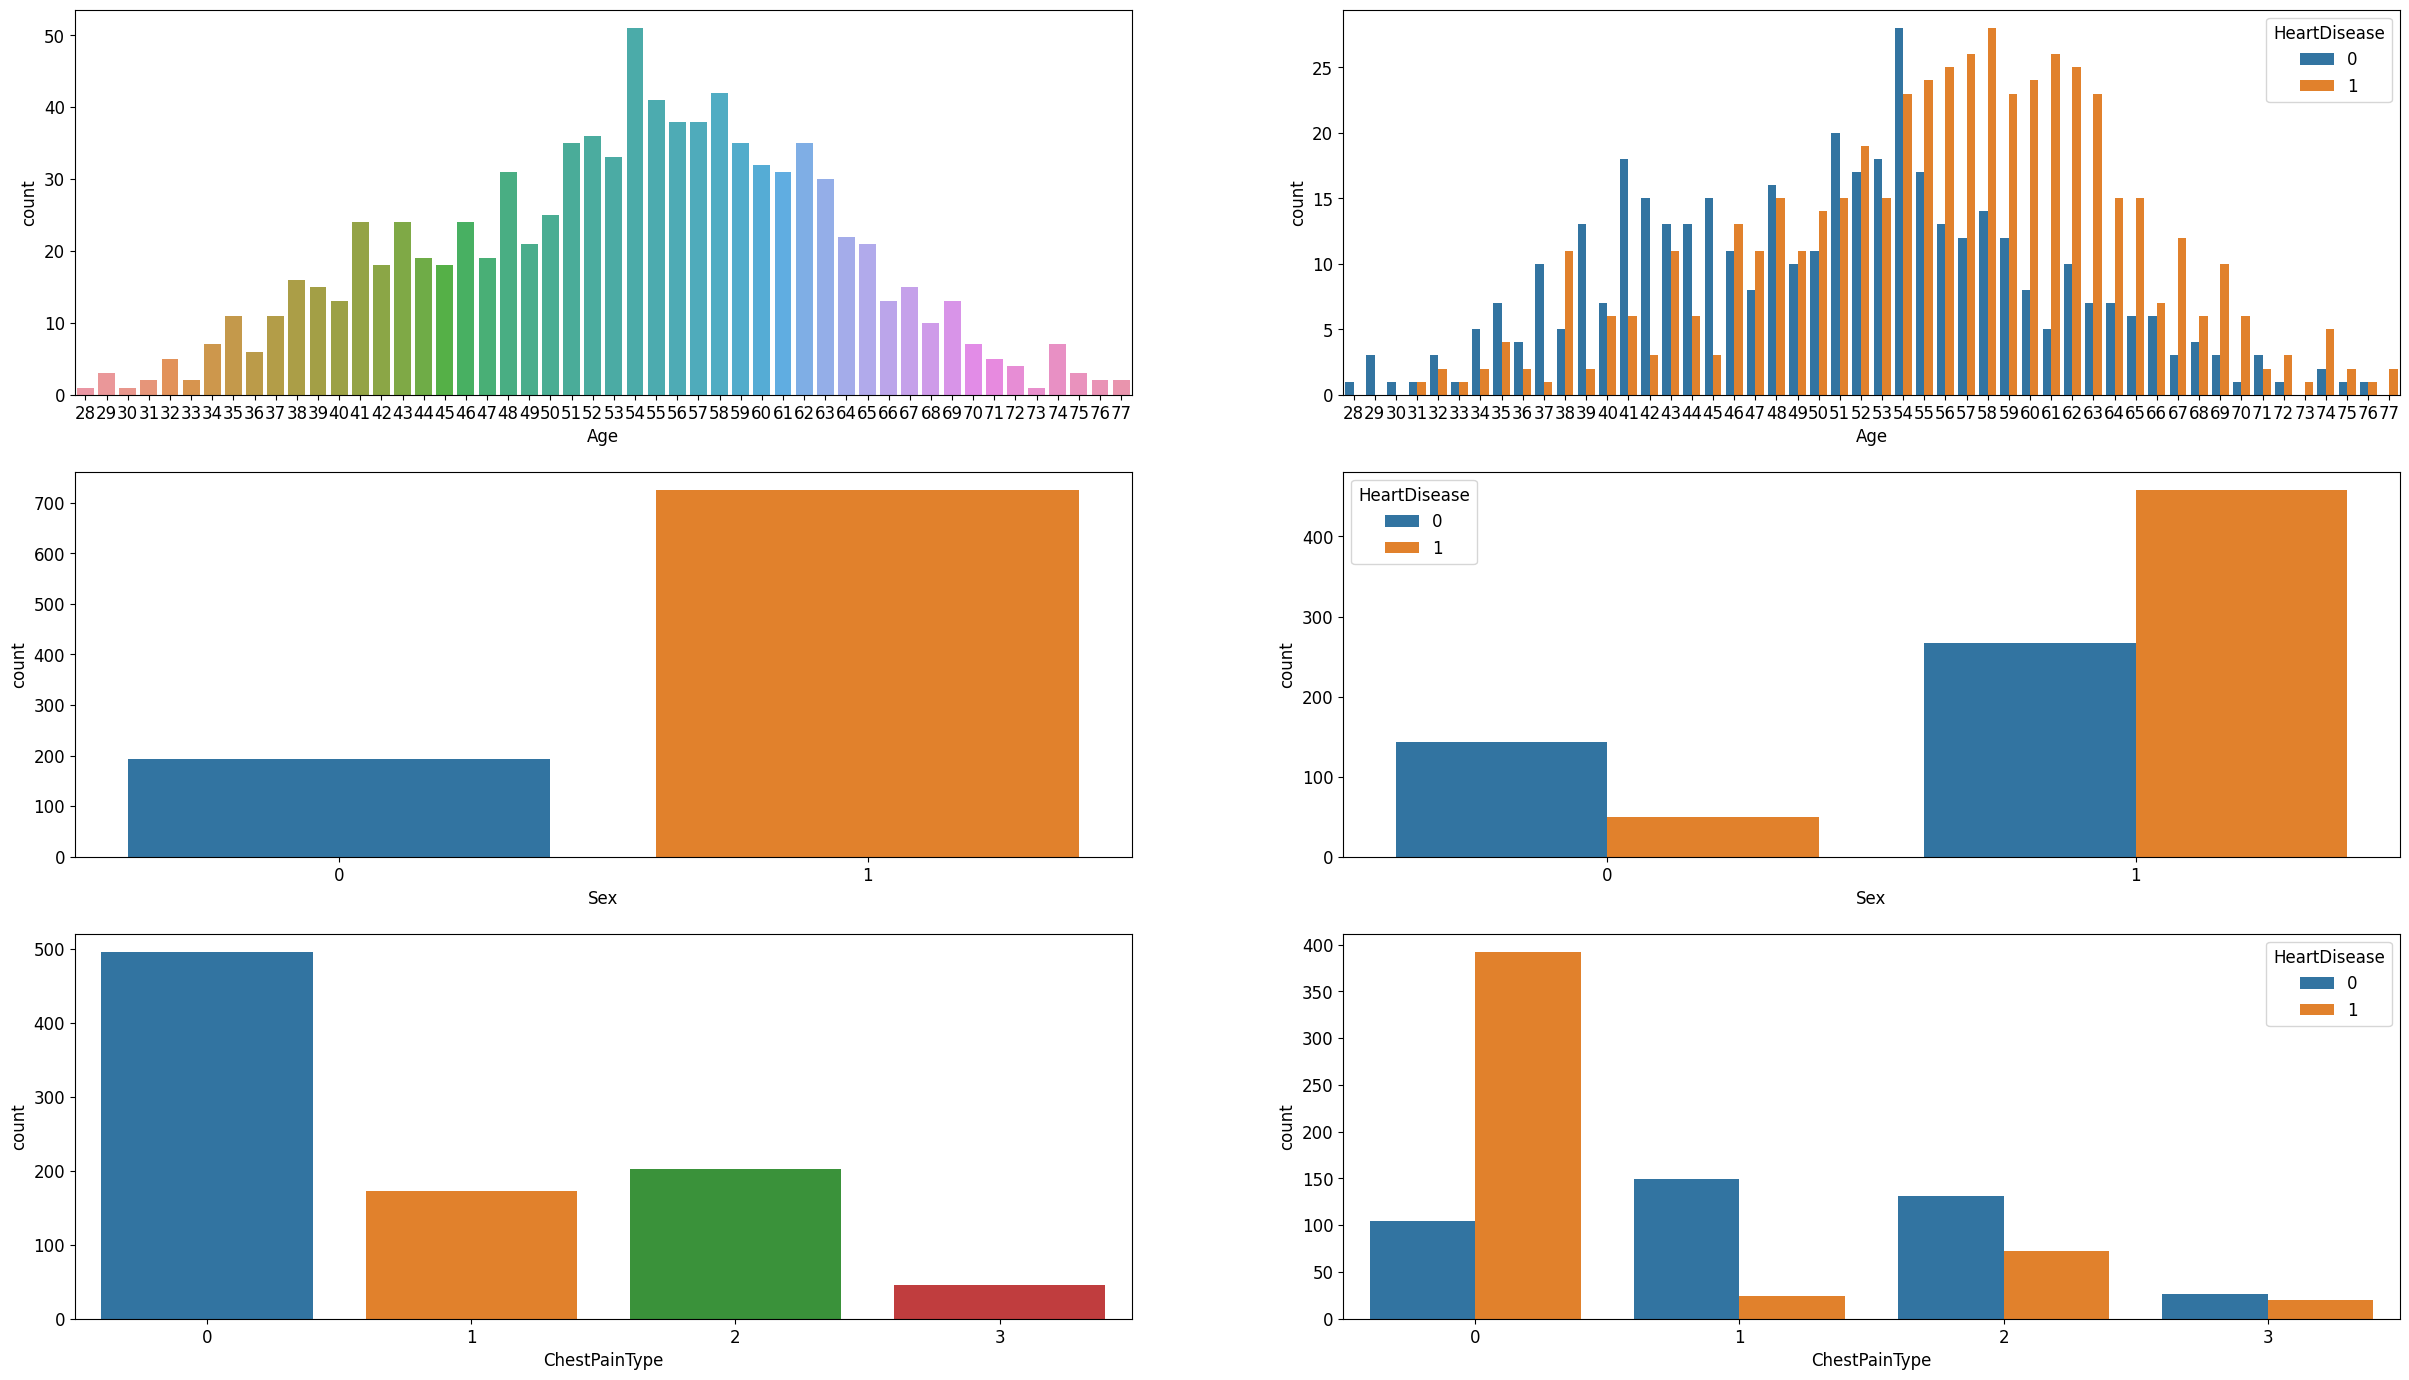

In [173]:
# Рассмотрим категориальные признаки (количества заболеваний в зависимости от разных факторов)
fig,ax=plt.subplots(3,2,figsize=(30,17))
for index, cat in enumerate(df):
  sns.countplot(df,x=cat,ax=ax[index,0])
  sns.countplot(df,x=cat,ax=ax[index,1],hue='HeartDisease')

В части целевой переменной набор классов достаточно сбалансированный. Отразим еще раз на отдельном графике данные по заболеваниям сердца в зависимости от пола (0-Отсутствуют, 1-Имееются)

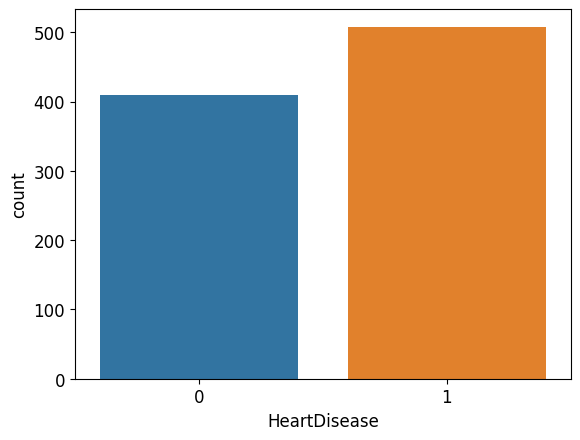

In [145]:
sns.countplot(x="HeartDisease", data=df)
plt.show()

Дубликаты в данных отсутствуют

# Однофакторный анализ
### Просмотрим общие статистические данные для получения моментального снимка данных

In [146]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


Можно сразу заметить, что данные несбалансированные и потребуется предварительная обработка данных.

In [147]:
#Выведем значения категориальных переменных
print('Sex: ',df['Sex'].unique())
print('ChestPainType: ',df['ChestPainType'].unique())
print('RestingECG:', df['RestingECG'].unique())
print('ExerciseAngina:', df['ExerciseAngina'].unique())
print('ST_Slope:', df['ST_Slope'].unique())
print('FastingBS:', df['FastingBS'].unique())

Sex:  ['M' 'F']
ChestPainType:  ['ATA' 'NAP' 'ASY' 'TA']
RestingECG: ['Normal' 'ST' 'LVH']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']
FastingBS: [0 1]


Проведем преобразование категориальных признаков в численное представление.


In [148]:
df['Sex'] = preprocessing.LabelEncoder().fit_transform(df['Sex'])
df['ChestPainType'] = preprocessing.LabelEncoder().fit_transform(df['ChestPainType'])
df['RestingECG'] = preprocessing.LabelEncoder().fit_transform(df['RestingECG'])
df['ExerciseAngina'] = preprocessing.LabelEncoder().fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = preprocessing.LabelEncoder().fit_transform(df['ST_Slope'])
df['FastingBS'] = preprocessing.LabelEncoder().fit_transform(df['FastingBS'])

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [150]:
df.head()

,Age,Sex,ChestPainType,RestingBP,...,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,...,0,0.0,2,0
1,49,0,2,160,...,0,1.0,1,1
2,37,1,1,130,...,0,0.0,2,0
3,48,0,0,138,...,1,1.5,1,1
4,54,1,2,150,...,0,0.0,2,0


In [151]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
ChestPainType,918.0,0.781046,0.956519,0.0,0.00,0.0,2.0,3.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
RestingECG,918.0,0.989107,0.631671,0.0,1.00,1.0,1.0,2.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
ExerciseAngina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


Чтобы найти связи болезней сердца с разными параметрами, нужно построить корреляционную матрицу, которая показывает определенные соотношения между признаками

<Axes: >

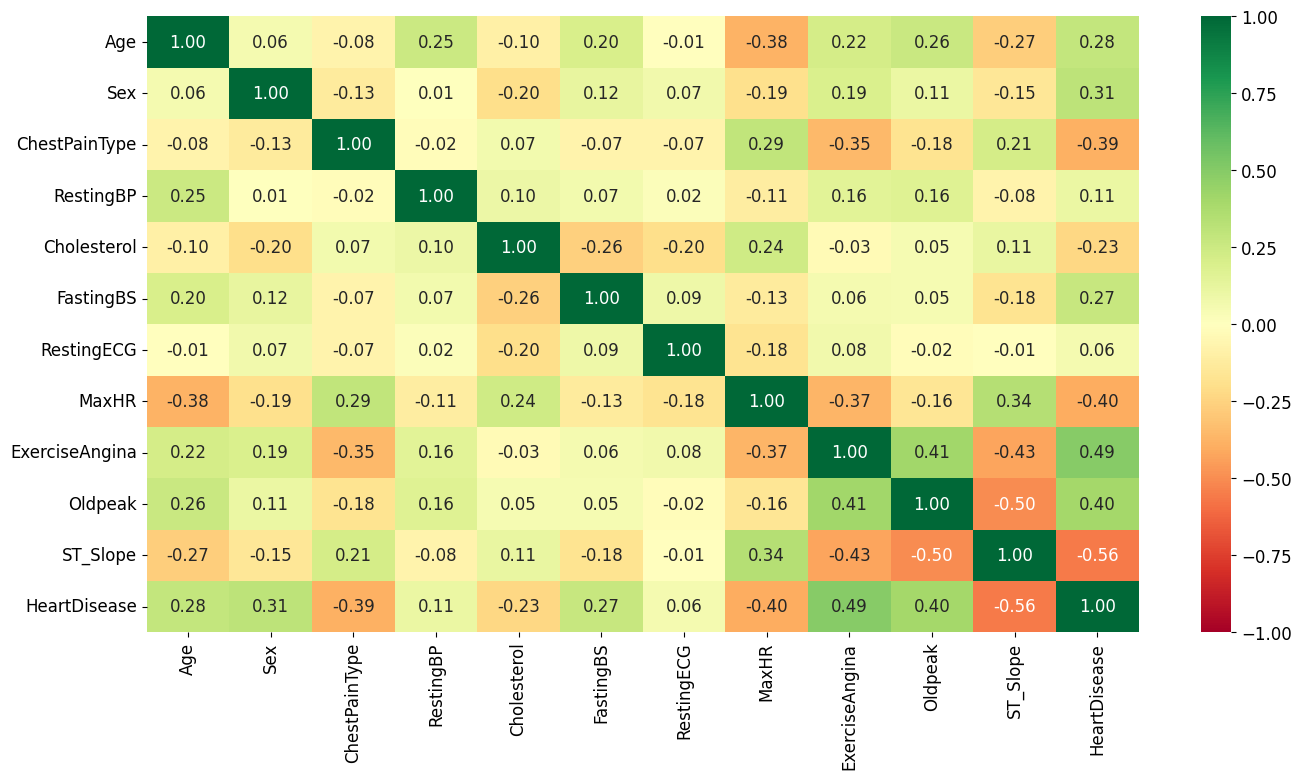

In [152]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(),  annot=True, cmap='RdYlGn', fmt='0.2f',vmin=-1, vmax=1)

Как показывает тепловая карта особое влияние оказывают следующие признаки: стенокардия, крованное давление и изменение сегментов ЭКГ.

In [153]:
# Построим график заболеваний сердца в зависимости от пола

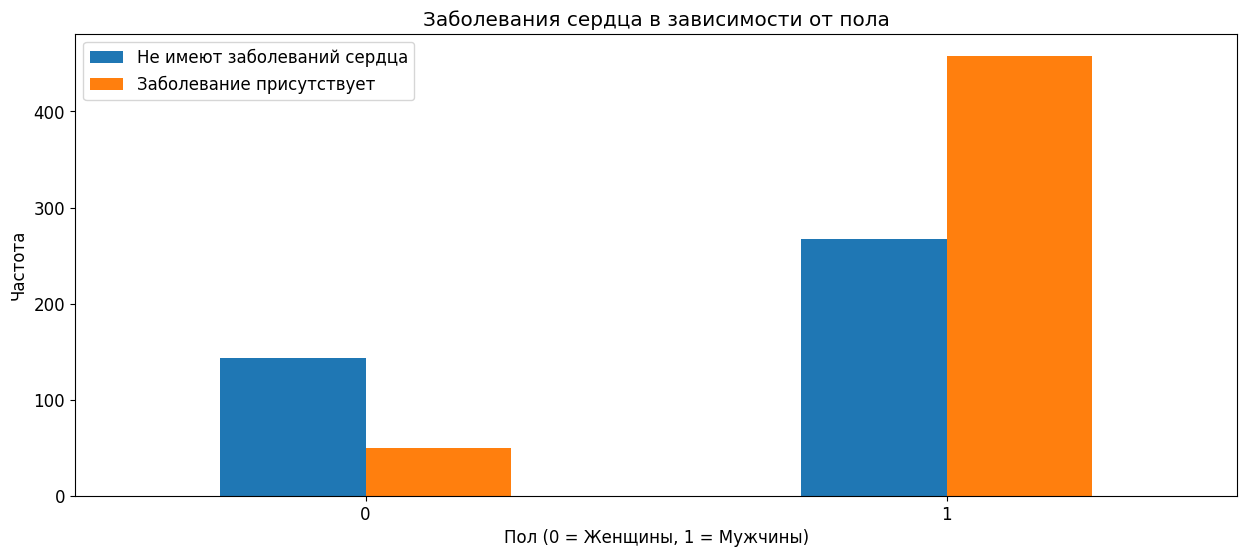

In [154]:
pd.crosstab(df.Sex,df.HeartDisease).plot(kind="bar", figsize=(15, 6))
plt.title('Заболевания сердца в зависимости от пола')
plt.xlabel('Пол (0 = Женщины, 1 = Мужчины)')
plt.xticks(rotation=0)
plt.legend(["Не имеют заболеваний сердца", "Заболевание присутствует"])
plt.ylabel('Частота')
plt.show()

Мужчины болеют чаще, чем женщины

Для предварительного анализа особенностей каждого признака построим гистрогаммы с распределением.

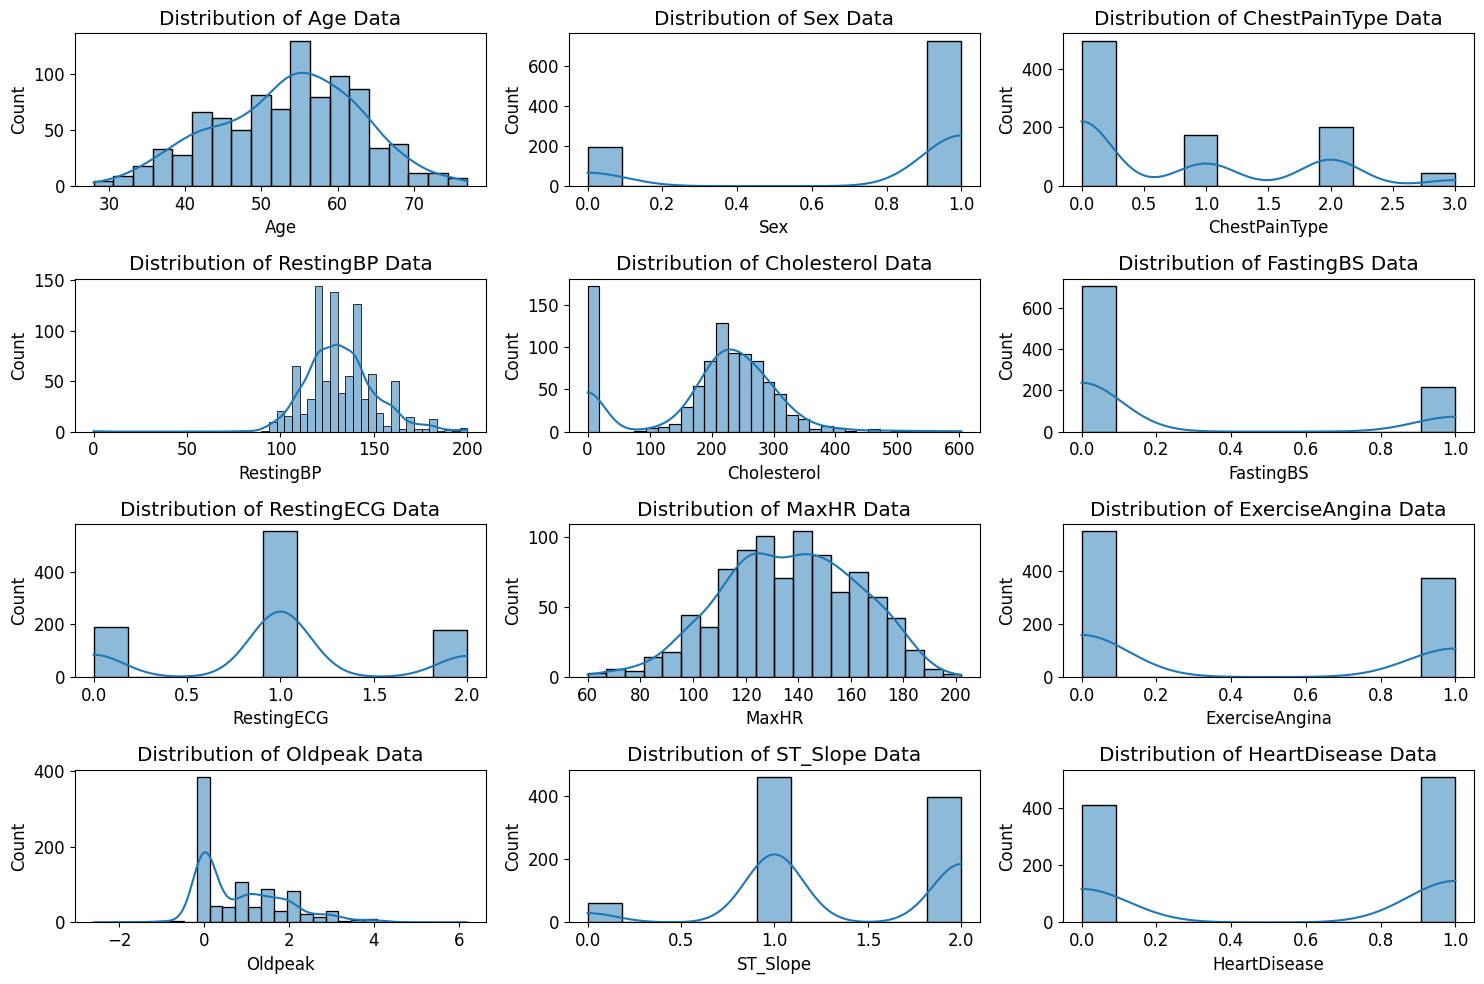

In [155]:
plt.figure(figsize=(15,10), edgecolor="black")
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f'Distribution of {col} Data')
    sns.histplot(df[col],kde=True)
    plt.tight_layout()

<Axes: >

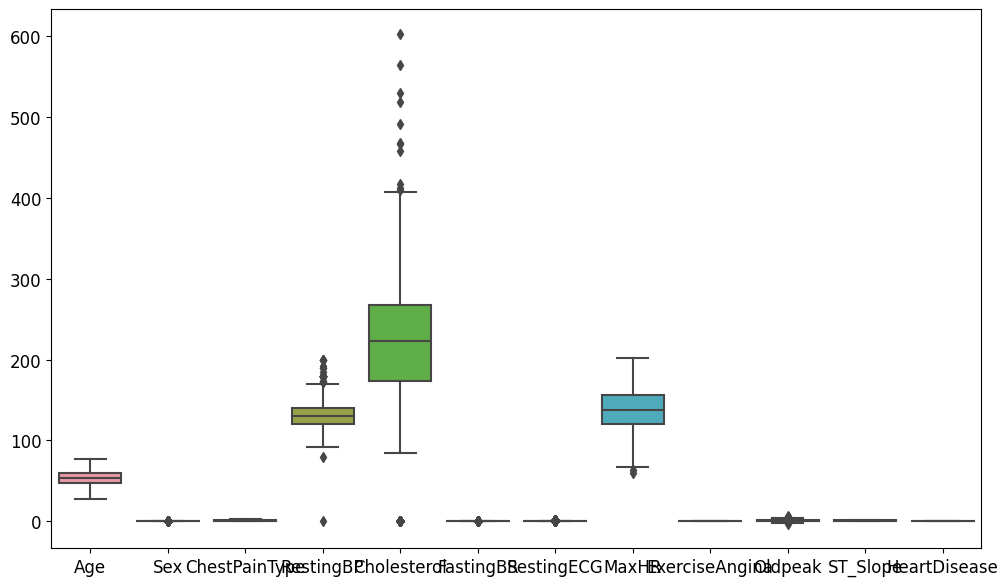

In [156]:
# Посмотрим на выбросы немного по другому, изобраим распределение на графике ящика с усами
plt.figure(figsize=(12, 7))
sns.boxplot(df)

Графики показывают относительно нормальное распределение данных, имеются незначительные выбросы, будем считать это реальными данными/симптомами заболевания, а не ошибочными. Но при этом потребуется нормирование числовых данных.

Целевой переменной явно зададим категориальный тип.

In [157]:
df['HeartDisease'] = df['HeartDisease'].astype('category')

#Постановка задачи и построение модели

Рассмотрим построение модели машинного обучения, для классификации наличия сердечно-сосудистого заболевания, с учетом подготовленных признаков.

In [158]:
X = df.loc[:, df.columns != 'HeartDisease']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 79.0 KB


In [159]:
y= df['HeartDisease']

## Разделим выборку на обучающее и тестовое подмножество. 80% данных оставим на обучающее множество, 20% на тестовое.

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Нормировка данных

In [161]:
from sklearn.preprocessing import StandardScaler

In [162]:
sc = StandardScaler()
# Проведем дополнительно трансформацию переменных, которые необходимо преобразовать (стандартизовать) Age, RestingBP, Cholesterol, MaxHR, OldPeak
var_transform = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
X_train[var_transform] = sc.fit_transform(X_train[var_transform])
X_test[var_transform] = sc.transform(X_test[var_transform])

In [163]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,...,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,-1.245067,1,2,-0.708985,...,2.284353,0,-0.097061,0
25,-1.886236,1,2,-0.166285,...,1.652241,0,-0.836286,2
84,0.250993,1,0,0.919115,...,-0.441628,1,0.087745,1
10,-1.779375,0,2,-0.166285,...,0.229991,0,-0.836286,2
344,-0.283314,1,0,-0.708985,...,-1.271274,0,-0.836286,1


In [164]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(734, 11)
(184, 11)
(734,)
(184,)


## LogisticRegression

In [165]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [166]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [167]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[68,  9],
       [20, 87]])

In [168]:
model.coef_

array([[ 0.14350658,  1.11143841, -0.59871167,  0.06656127, -0.49388997,
         0.89988691, -0.26278431, -0.21214206,  1.21602023,  0.49586665,
        -1.62851952]])

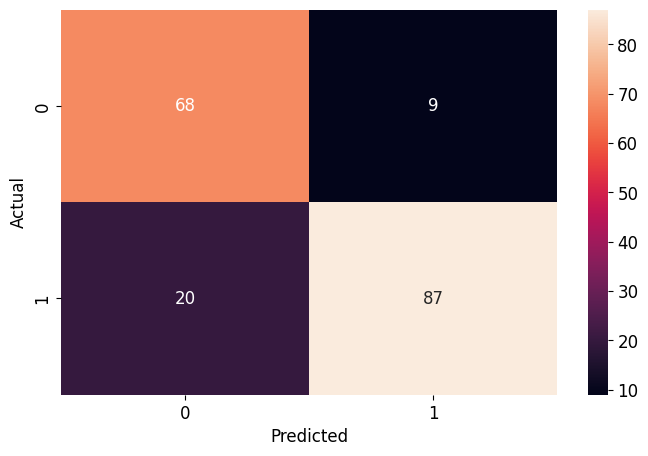

In [169]:
plt.figure(figsize = (8, 5))
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Визуализируем модель логистической регрессии
ROC-кривая — кривая, которая наиболее часто используется для представления результатов бинарной классификации в машинном обучении.

In [170]:
from sklearn import metrics

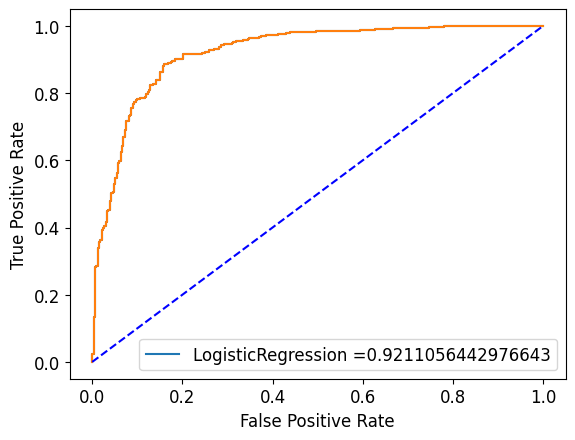

In [171]:
y_pred_proba = model.predict_proba (X_train)[:,1]
fpr, tpr, treshold = metrics. roc_curve (y_train, y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
plt.plot(fpr,tpr,label='LogisticRegression =' + str(auc))

plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0,1],[0,1], color='blue',linestyle='--')
plt.show()

# Интервал AUC (площади под графиком)  = 0,92, что говорит об отличном качестве обученной модели.